Problem Statement:
Graph coloring is a task that involves assigning colors to the vertices of a graph with the condition that no adjacent vertices share the same color. The primary objective is to minimize the number of colors used, making it a crucial problem in various domains like scheduling, compiler register allocation, and wireless communication frequency assignment.

Algorithm used : Backtracking

The application of the backtracking method to solve the graph coloring problem unfolds through a systematic exploration of the solution space. The algorithm attempts different color assignments for each vertex. In situations where the current choices lead to an invalid solution, the algorithm employs a backtracking strategy. It revisits previous decision points and explores alternative choices, continuing this process until either a valid coloring is discovered or all possible combinations are exhausted.

Initial graph with no color:


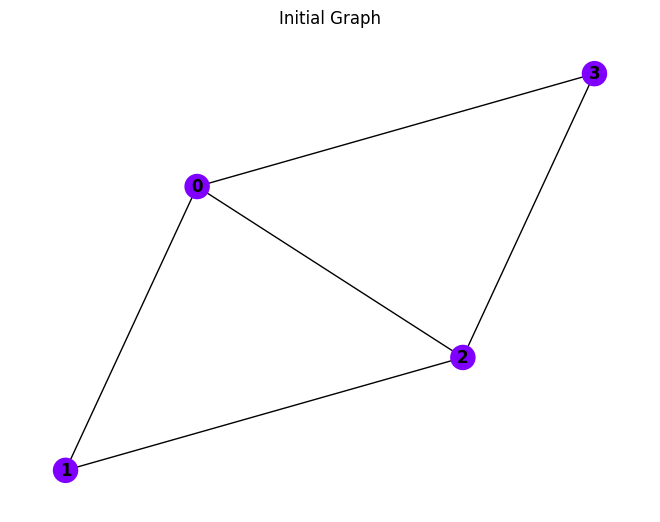

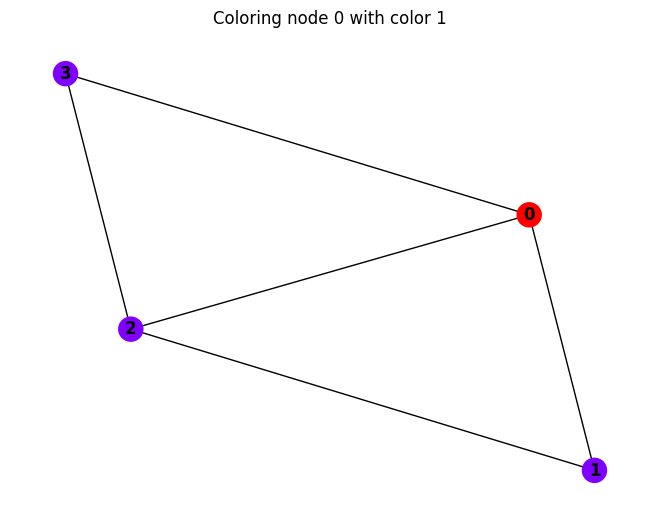

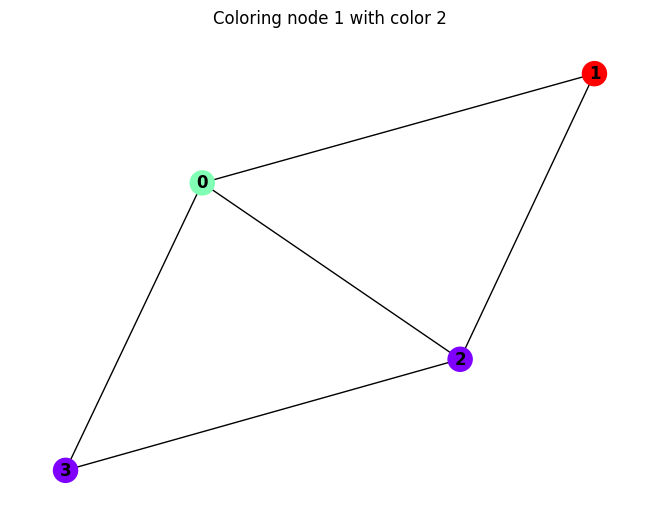

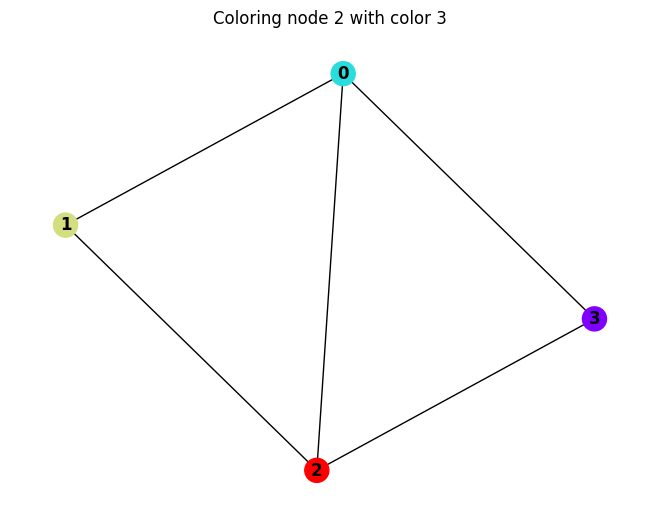

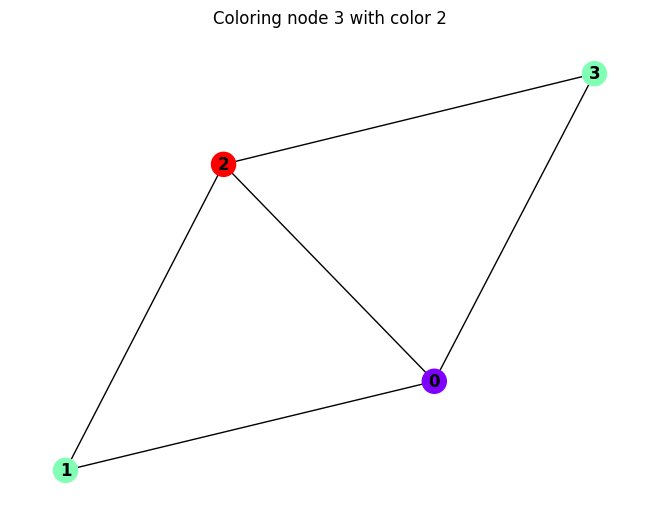


Solution exists, and the following are the assigned colors:
1 2 3 2 
Minimum number of colors required: 3


In [12]:
#  A) Utilize the libraries for graph visualization.
import networkx as nx
import matplotlib.pyplot as plt
#END  A)
class Graph():

    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]

    def isSafe(self, v, colour, c):
        for i in range(self.V):
            if self.graph[v][i] == 1 and colour[i] == c:
                return False
        return True
          # B)  Implement a class or a set of functions to represent the graph coloring algorithm.
    def graphColourUtil(self, m, colour, v, visualization):
        if v == self.V:
            return True

        for c in range(1, m + 1):
            if self.isSafe(v, colour, c) == True:
                colour[v] = c
                if visualization:
                    self.visualize_graph(colour, f"Coloring node {v} with color {c}")
                if self.graphColourUtil(m, colour, v + 1, visualization) == True:
                    return True
                colour[v] = 0
#END OF B)
# C) Update the visualization at each step of the backtracking algorithm to show the current coloring of the graph.
    def visualize_graph(self, color, title):
        G = nx.Graph()
        G.add_nodes_from(range(self.V))
        for i in range(self.V):
            for j in range(i + 1, self.V):
                if self.graph[i][j] == 1:
                    G.add_edge(i, j)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color=color, cmap=plt.cm.rainbow, font_weight='bold')
        plt.title(title)
        plt.show()
#END OF PART C)
# D Implement a function to visualize the initial graph before coloring.
    def graphColouring(self, m, visualization=True):
        colour = [0] * self.V
        if visualization:
            print("Initial graph with no color:")
            self.visualize_graph(colour, "Initial Graph")
       #D END)
        if self.graphColourUtil(m, colour, 0, visualization) == None:
            print("Solution does not exist.")
            return False


        print("\nSolution exists, and the following are the assigned colors:")
        for c in colour:
            print(c, end=' ')
        min_colors = max(colour)
        print(f"\nMinimum number of colors required: {min_colors}")
        return True

if __name__ == '__main__':
    g = Graph(4)
    g.graph = [[0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 1], [1, 0, 1, 0]]
    m = 3

    # Function call with visualization
    g.graphColouring(m)

E) Minimum Colors Output: Print or display the minimum number of colors required to color the entire graph | AND | D) Display the final color assigned to each vertex in the graph.